# Numerical Practicum: HW1 
## Intro - Recap of Preliminaries

In [95]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
# from sympy import Function, dsolve, Eq, Derivative, symbols
import sympy as sp
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)
import numpy as np
from scipy.integrate import solve_ivp
print("Succesfully imported %s"%solve_ivp.__name__)

Succesfully imported numpy -- Version: 1.20.1
Succesfully imported scipy -- Version: 1.6.2
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.2.4
Succesfully imported scipy.optimize
Succesfully imported solve_ivp


## Section 5/6: Extension to Data Handling Methods  

### Subsection 1/5/6: Numerical integration or quadrature  
Motivation: (1/2) from solution of differential equation to inflow or outflow rates or heat fluxes; (2/2) uses in weighted average of the solution such as Fourier analysis; 

1. [Numerical Integration in Python](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter21.00-Numerical-Integration.html) 
2. [Numerical Integration on wiki](https://en.wikipedia.org/wiki/Numerical_integration) 
3. Numerical implementation, analytical reference, exercises; easy, unless rapid oscillations or singularities;

#### Symbolic Computations using sympy 

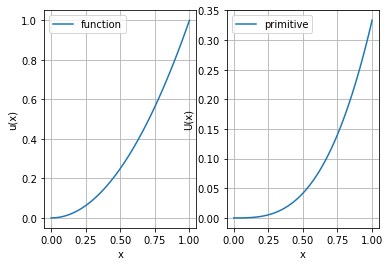

In [130]:
#..define symbol x (spatial coordinate), function f (source) and function u (unknown)
x = sp.symbols('x')
u = sp.Function("u") 

#..define the expression for the givrn function 
u = x**2 

#..compute derivative symbolically
U = sp.integrate(u, x) 

#..to switch from symbolic to numerical computation
#..we need to perform a "lambdification" of the right-hand side of the solution
#..the function created accepts vector arguments 
u_lambda = sp.lambdify(x, u)
U_lambda = sp.lambdify(x, U)

#..sample the lambda expression for the computed solution 
N = 100; Np1 = N+1;  
xvec = np.linspace(0,1,Np1)
uvec = u_lambda(xvec)
Uvec = U_lambda(xvec)

#..plot the computed solutions 
fig, axs = plt.subplots(1, 2) 
axs[0].plot(xvec, uvec, label='function')
axs[0].set_xlabel('x')
axs[0].set_ylabel('u(x)')
axs[0].legend(loc='best')
axs[0].grid()
axs[1].plot(xvec, Uvec, label='primitive')
axs[1].grid()
axs[1].set_xlabel('x')
axs[1].set_ylabel('U(x)')
axs[1].legend(loc='best')

#### Numerical Computations using scipy 

#### Numerical Computations using sympy

### Subsection 2/5/6: Numerical Differentiation 
Motivation: (1/2) from position of a point-mass (molecule) to velocity (first order derivative) and acceleration (second order derivative), from species to reation rate and time-change of the reaction rate; (2/2) from potential to flux and field.     

1. Numerical differentiation using linear, quadratic and cubic spline approximation using  [scipy.interpolate](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html?highlight=spline);
2. [Numerical differentiation in Python](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.00-Numerical-Differentiation.html) 
3. [Numerical Differentiation on wiki](https://en.wikipedia.org/wiki/Numerical_differentiation)
4. Finite difference method, analytical method (sympy) as reference, what goes wrong, slides as references, exercises; 

#### Symbolic Computations using sympy 

In [ ]:
#..define symbol x (spatial coordinate), function f (source) and function u (unknown)
x = sp.symbols('x')
u = sp.Function("u") 

#..define the expression for the givrn function 
u = x**2 

#..compute derivative symbolically
ux = sp.diff(u, x)

#..to switch from symbolic to numerical computation
#..we need to perform a "lambdification" of the right-hand side of the solution
#..the function created accepts vector arguments 
u_lambda = sp.lambdify(x, u)
ux_lambda = sp.lambdify(x, ux)

#..sample the lambda expression for the computed solution 
N = 100; Np1 = N+1;  
xvec = np.linspace(0,1,Np1)
uvec = u_lambda(xvec)
uxvec = ux_lambda(xvec)

#..plot the computed solution 
fig, axs = plt.subplots(1, 2) 
axs[0].plot(xvec, uvec, label='function')
axs[0].set_xlabel('x')
axs[0].set_ylabel('u(x)')
axs[0].legend(loc='best')
axs[0].grid()
axs[1].plot(xvec, uxvec, label='derivative')
axs[1].grid()
axs[1].set_xlabel('x')
axs[1].set_ylabel('ux(x)')
axs[1].legend(loc='best')

#### Numerical Computations using scipy 

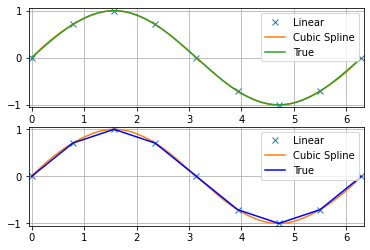

In [125]:
from scipy import interpolate

# generate data 
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)

# generate spline representation order k and smoothness s
tck = interpolate.splrep(x, y, k=2, s=0)

# generate data for plotting 
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

fig, axs = plt.subplots(2, 1) 
axs[0].plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew))
axs[0].legend(['Linear', 'Cubic Spline', 'True'])
axs[0].axis([-0.05, 6.33, -1.05, 1.05])
axs[0].grid()
axs[1].plot(x, y, 'x', xnew, ynew, x, y, 'b')
axs[1].legend(['Linear', 'Cubic Spline', 'True'])
axs[1].axis([-0.05, 6.33, -1.05, 1.05])
axs[1].grid()

#### Numerical Computations using sympy

In [131]:
def integrand(r):
    return 1+r+r**2
rmin = 0; rmax = 1; 
N = 100; rstep = (rmax-rmin)/N
rsampled = np.linspace(rmin, rmax, num=N+1)
integral = 0 
for i in range(N): 
    rinterval = np.array([rsampled[i], rsampled[i+1]])
    Iinterval = integrand(rinterval)
    contrib = np.sum(Iinterval)*rstep/2 
    integral += contrib; 
print(integral)

### Subsection 3/5/6: Fast Fourier Transform  
1. (Fast Discrete) Fourier Transform, frequency content a signal in time using [sympy.fourierseries](https://docs.sympy.org/latest/modules/series/fourier.html) and [scipy.fft](https://docs.scipy.org/doc/scipy/reference/fft.html)
2. [FFT in Python](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.00-Fourier-Transforms.html)
3. Tutorials on ANM, FFT of single frequency, multiple frequencies and more complex functions; 

#### Symbolic Computations using sympy 
Verify De Moivre using Fourier series 

In [136]:
#..define symbol x (spatial coordinate), function f (source) and function u (unknown)
t = sp.symbols('t')
u = sp.Function("u") 

s = sp.fourier_series(sp.sin(sp.pi*t), (t, 0, 1))
print(s)

FourierSeries(sin(pi*t), (t, 0, 1), (2/pi, SeqFormula(2*Piecewise((0, Eq(_n, -1/2) | Eq(_n, 1/2)), (-cos(2*_n*pi)/(4*_n**2*pi - pi) - 1/(4*_n**2*pi - pi), True))*cos(2*_n*pi*t), (_n, 1, oo)), SeqFormula(2*Piecewise((-1/2, Eq(_n, -1/2)), (1/2, Eq(_n, 1/2)), (-sin(2*_n*pi)/(4*_n**2*pi - pi), True))*sin(2*_n*pi*t), (_n, 1, oo))))


#### Numerical Computations using scipy 

#### Numerical Computations using sympy

In [102]:
?scipy.interpolate.splrep

## Part 6/6: Extension to Optimization Methods  

1. Change problem set-up to meet predefined target using non-linear optimization method. Boundary control. Source function control. Compute cost function gradient and Hessian. Solve optimization problem using built-in method; 
2. List here possibly other extensions and implementation specific issues; 

In [106]:
def model(x, u):
     return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def fun(x, u, y):
     return model(x, u) - y

def jac(x, u, y):
     J = np.empty((u.size, x.size))
     den = u ** 2 + x[2] * u + x[3]
     num = u ** 2 + x[1] * u
     J[:, 0] = num / den
     J[:, 1] = x[0] * u / den
     J[:, 2] = -x[0] * num * u / den ** 2
     J[:, 3] = -x[0] * num / den ** 2
     return J

In [107]:
u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
...               8.33e-2, 7.14e-2, 6.25e-2])
>>> y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,
...               4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
>>> x0 = np.array([2.5, 3.9, 4.15, 3.9])
>>> res = scipy.optimize.least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)

`ftol` termination condition is satisfied.
Function evaluations 131, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.52e-08.
